## What causes Heart Diseaze?

## Contents

1.Introduction

2.Load Data

3.Data Exploration

4.The Explanation

5.Conclusion

## Introduction
Machine learning is good at find some latent regular in the data. In this data, there're many features, and a target now. So a lot of machine learning tools are good at do the prediction. However, we need to do the data exploration, and fit the data to machine learning tools.

## Column introduction
age: age in years
sex: (1 = male; 0 = female)
cp: chest pain type
trestbps: resting blood pressure (in mm Hg on admission to the hospital)
chol: serum cholestoral in mg/dl
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg: resting electrocardiographic results
thalach: maximum heart rate achieved
exang: exercise induced angina (1 = yes; 0 = no)
oldpeak: ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
ca: number of major vessels (0-3) colored by flourosopy
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
target: 1 or 0
## Load Data

-Load the data from the csv file

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
df = pd.read_csv('../input/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The data has 14 columns, 13 columns are the features, and 1 column is the target.

## Data Exploration

In [5]:
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


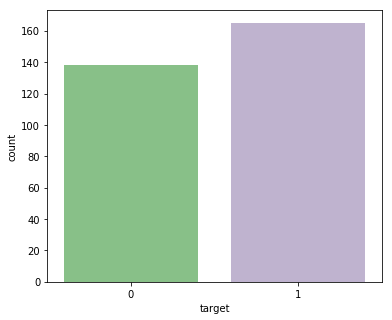

In [7]:
# Check the count of with disease and without disease
fig, ax = plt.subplots(figsize=(6.,5.))
sns.countplot(x= 'target', data=df, palette='Accent')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


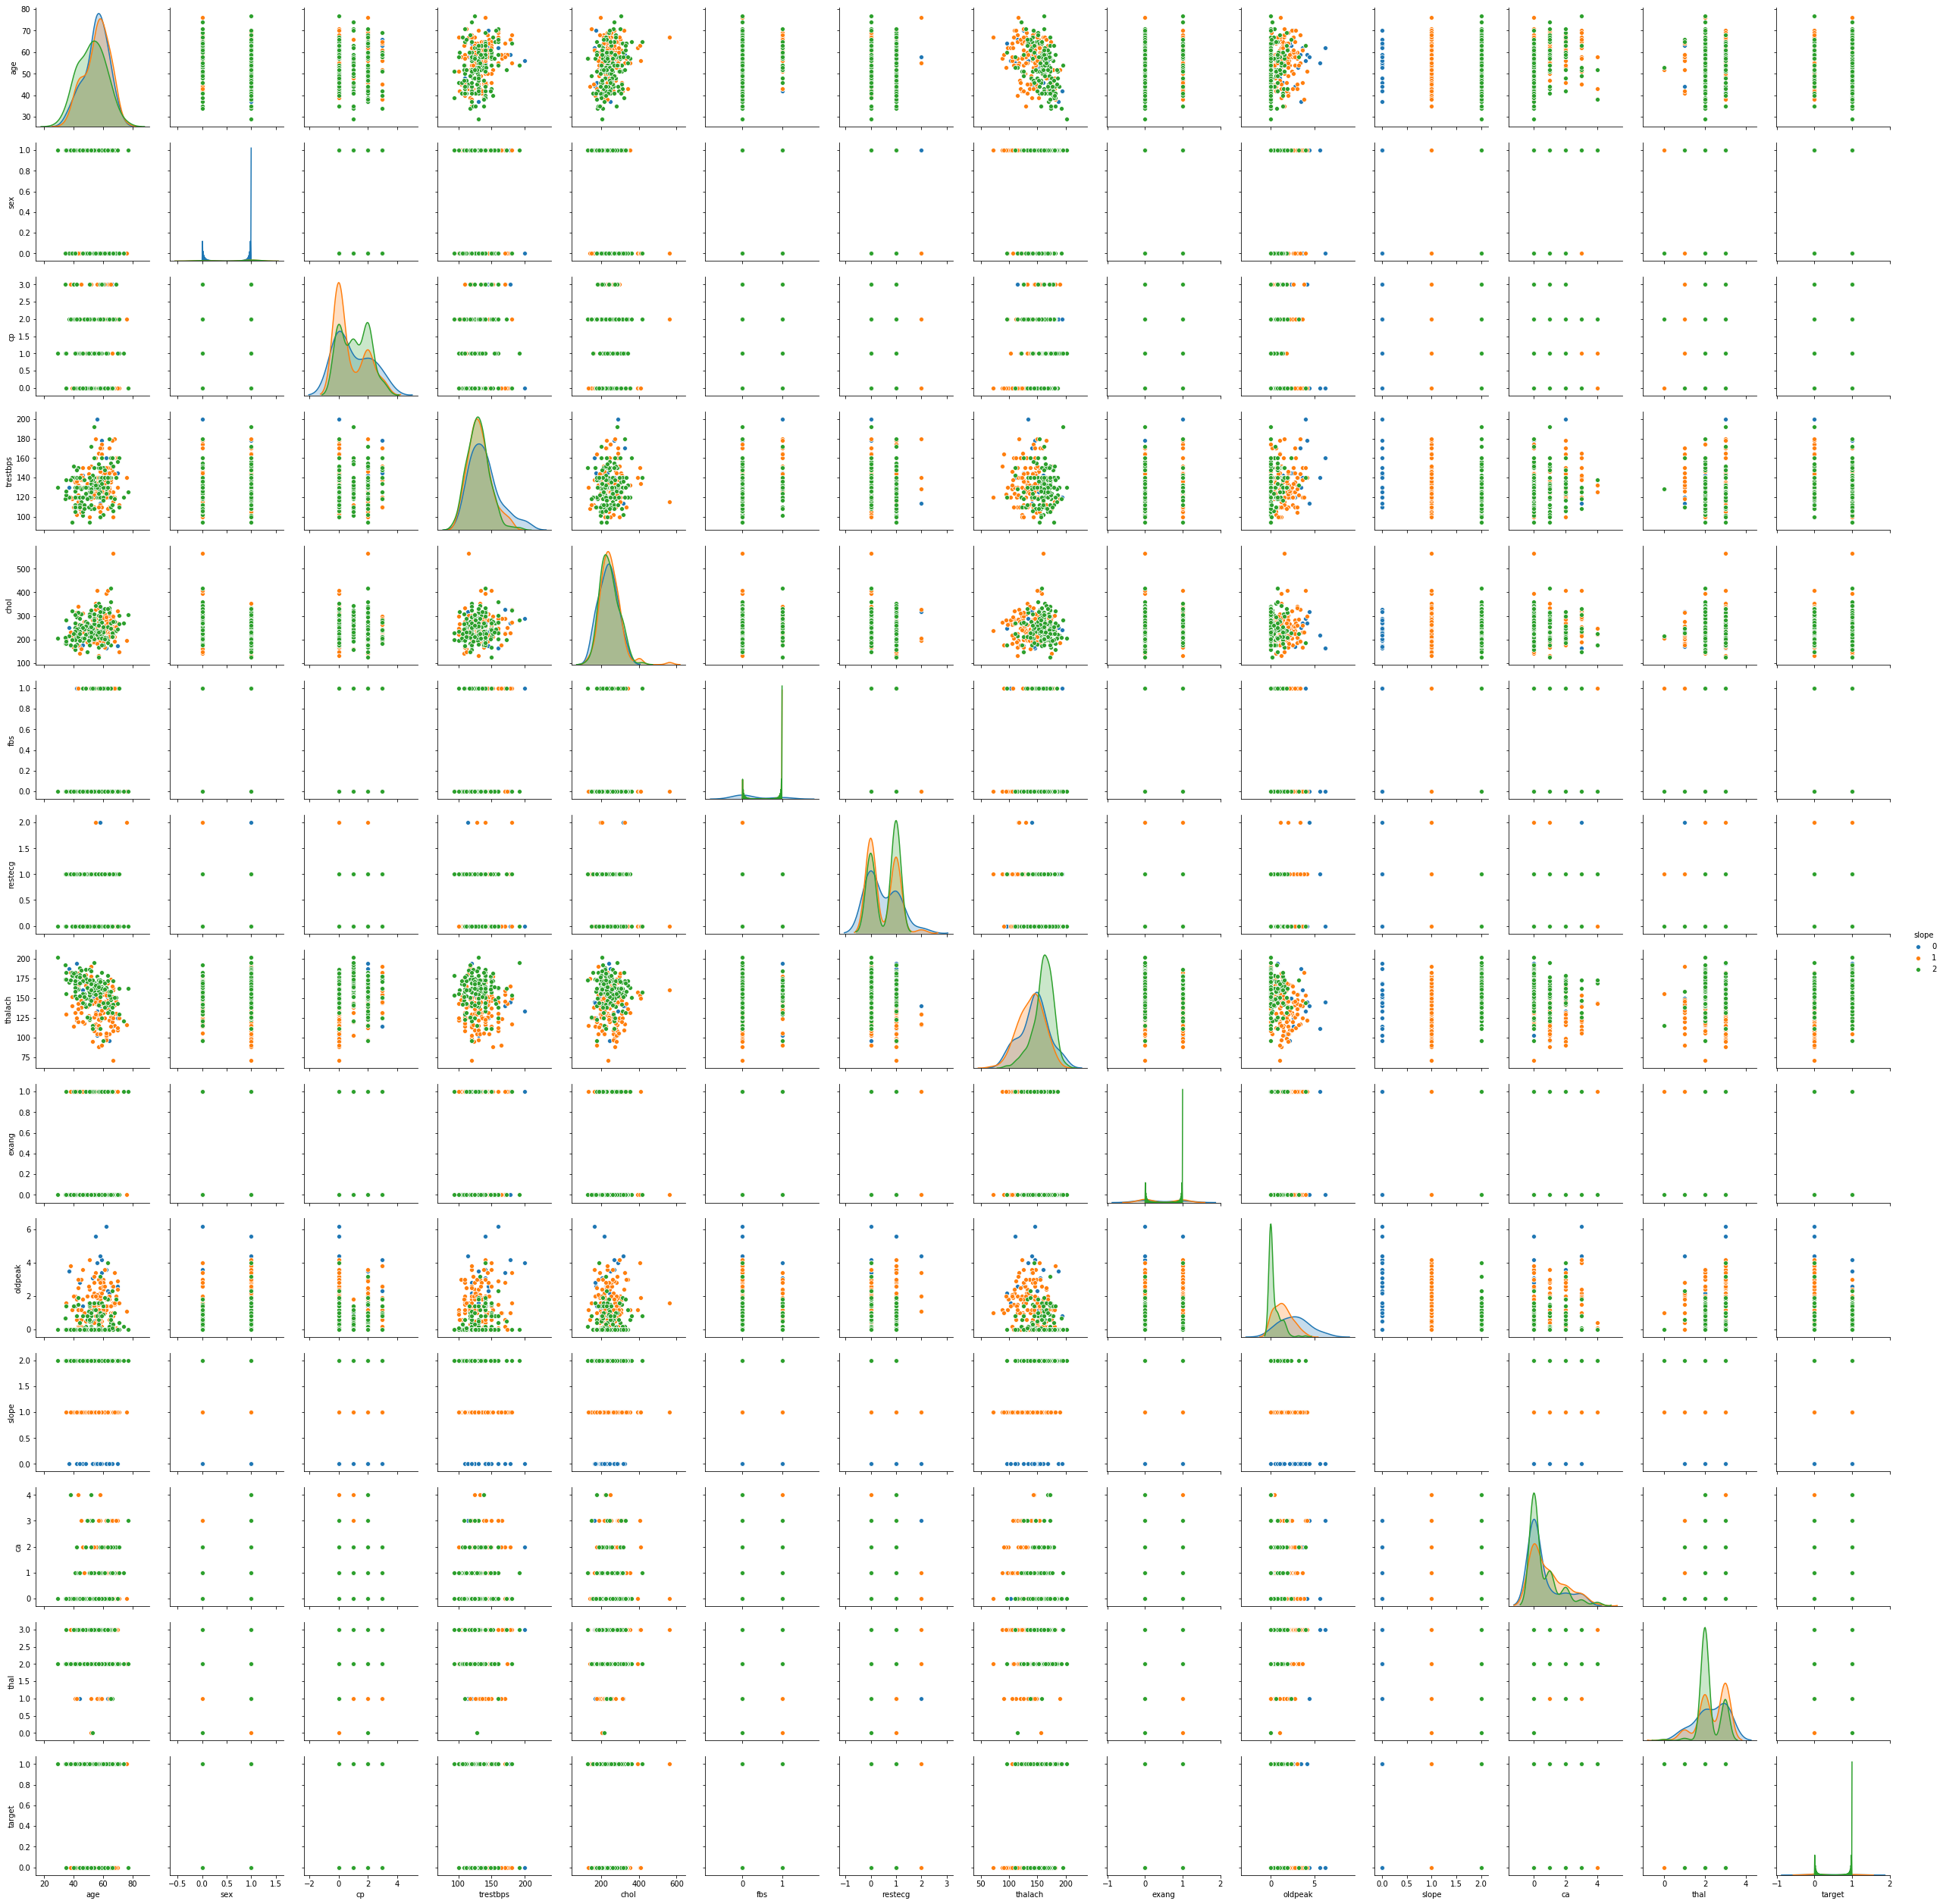

In [8]:
# use the pair plot try to find the inner relationship
g = sns.pairplot(df, hue="slope")

Scatterplots for joint relationships and continuous graph for univariate distributions.

Showing different levels of a categorical variable by the color of plot elements.

It seems there is no obvious distribution between two variables. So we need to do some analysis more specificly

## The disease rate difference between genders

Text(0, 0.5, 'Frequency')

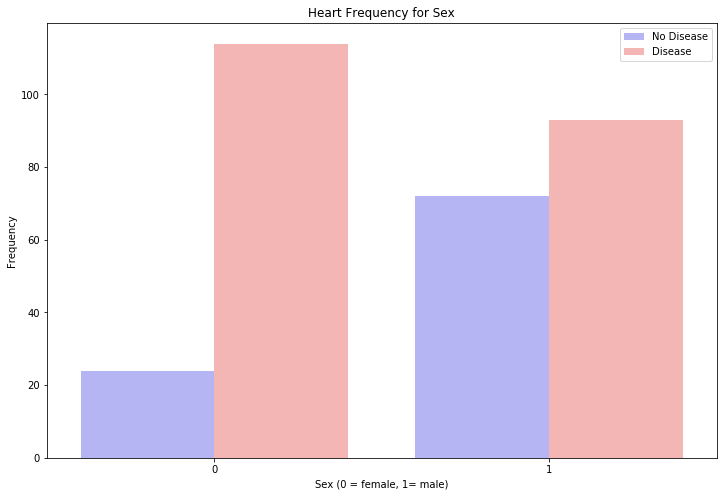

In [9]:
# The disease rate difference between genders
plt.figure(figsize=(12, 8))
sns.countplot(x = 'target', hue='sex', data = df,palette='bwr')
plt.xlabel("Sex (0 = female, 1= male)")
plt.title('Heart Frequency for Sex')
plt.legend(['No Disease', 'Disease'])
plt.ylabel('Frequency')

Female seems to have more possibility to suffer from heart disease.

Text(0, 0.5, 'Frequency')

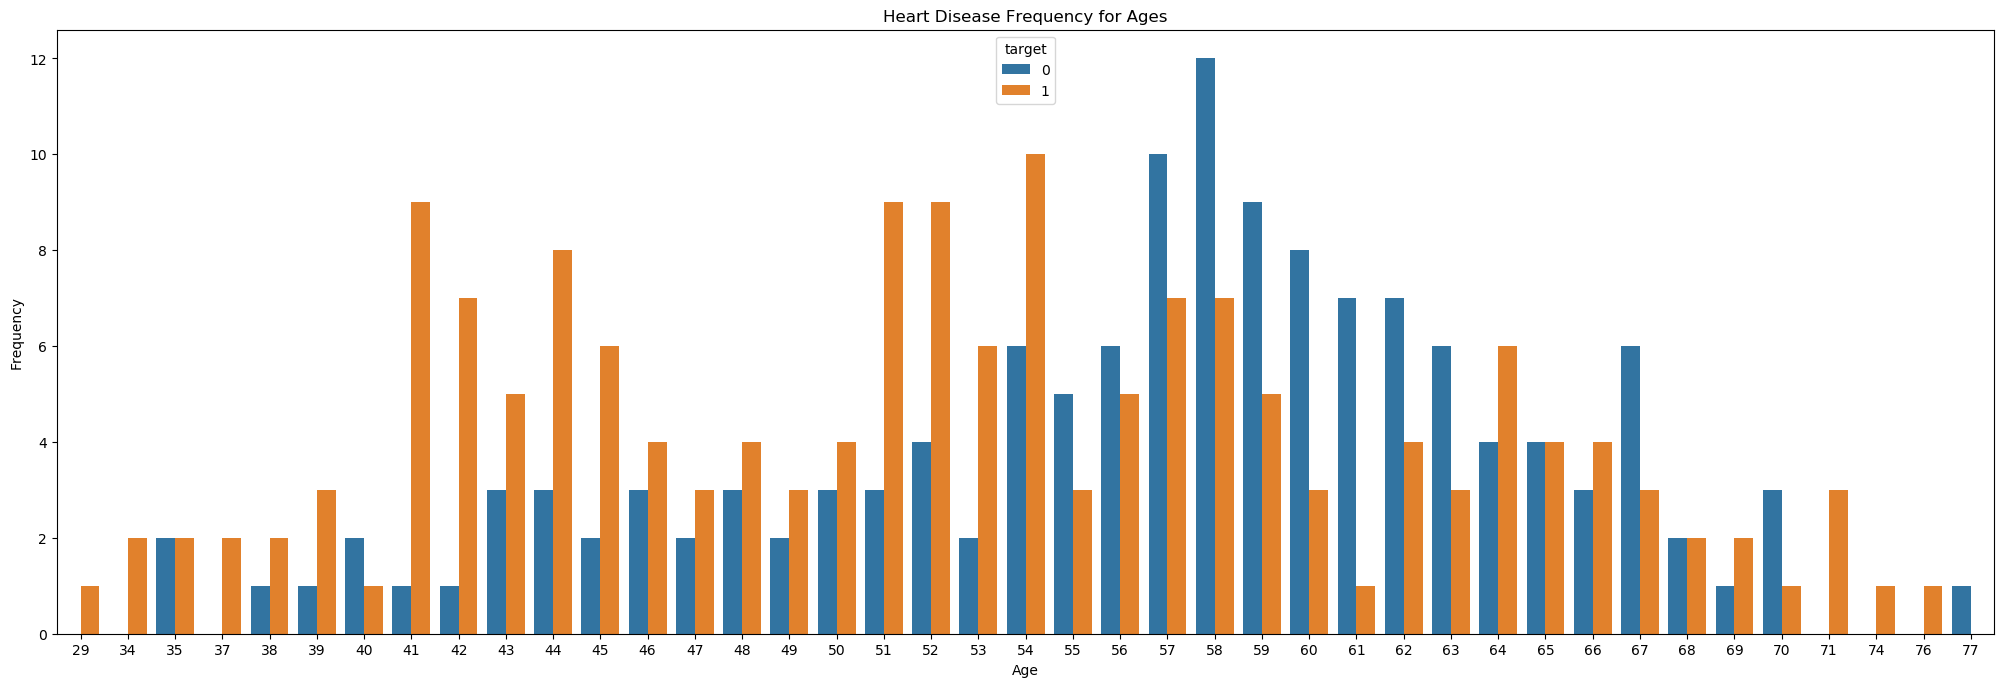

In [10]:
# what about the age
plt.figure(figsize=(25,8), dpi=100)
sns.countplot(x = 'age', hue='target', data=df)
plt.title('Heart Disease Frequency for Ages')
plt.xticks(rotation=0)
plt.xlabel('Age')
plt.ylabel('Frequency')

Age between 40 and 60 have the most possibility to have heart disease

In [11]:
# chest pain type
print("There are {} types of chest pain".format(len(df["cp"].unique())))

There are 4 types of chest pain


Text(0.5, 0, 'Chest pain type')

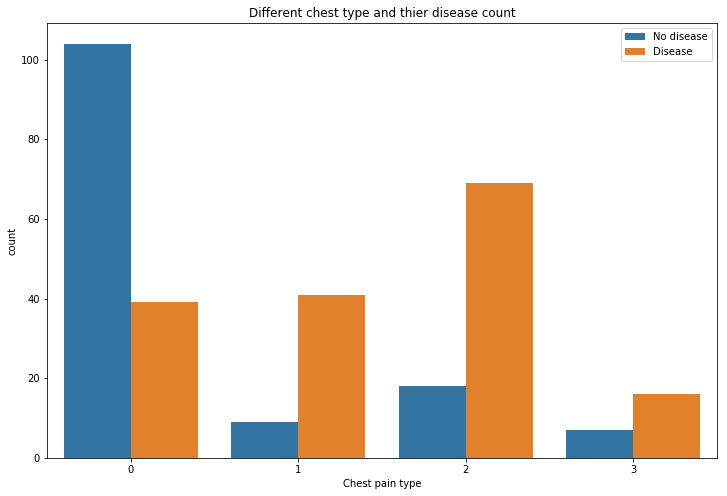

In [12]:
plt.figure(figsize=(12, 8))
sns.countplot(x ="cp", hue= "target", data=df)
plt.title("Different chest type and thier disease count")
plt.legend(['No disease', 'Disease'])
plt.xlabel("Chest pain type")

resting blood pressure

In [13]:
df.groupby('target')['trestbps'].mean()

target
0    134.398551
1    129.303030
Name: trestbps, dtype: float64

In [14]:
print("With disease, the average blood pressure is {}".format(df.groupby('target')['trestbps'].mean()[1]))
print("Normal, the average blood pressure is {}".format(df.groupby('target')['trestbps'].mean()[0]))

With disease, the average blood pressure is 129.3030303030303
Normal, the average blood pressure is 134.3985507246377


Text(0.5, 0, 'Target (0 = No disease, 1= Disease)')

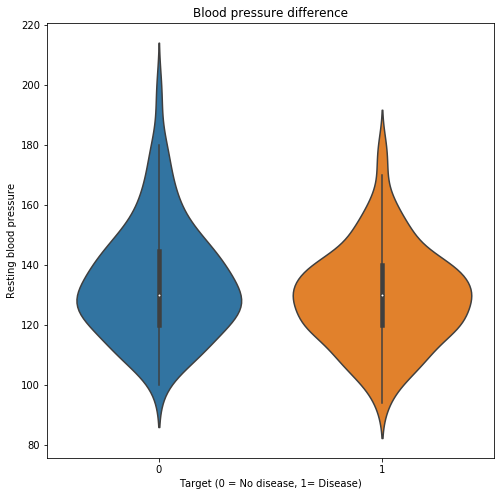

In [15]:
# The blood pressuer distribution
plt.figure(figsize=(8, 8))
sns.violinplot(x = 'target', y ='trestbps' ,data = df)
plt.title("Blood pressure difference")
plt.ylabel("Resting blood pressure")
plt.xlabel("Target (0 = No disease, 1= Disease)")

Resting blood pressure is not very important

Maxium heart rate

In [17]:
print("With disease, the average blood pressure is {}".format(df.groupby('target')['thalach'].mean()[1]))
print("Normal, the average blood pressure is {}".format(df.groupby('target')['thalach'].mean()[0]))

With disease, the average blood pressure is 158.46666666666667
Normal, the average blood pressure is 139.1014492753623


Text(0.5, 0, 'Target (0 = No disease, 1= Disease)')

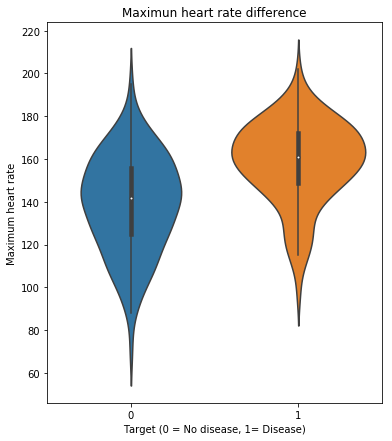

In [18]:
# The blood pressuer distribution
plt.figure(figsize=(6,7))
sns.violinplot(x = 'target', y ='thalach' ,data = df)
plt.title("Maximun heart rate difference")
plt.ylabel("Maximum heart rate")
plt.xlabel("Target (0 = No disease, 1= Disease)")

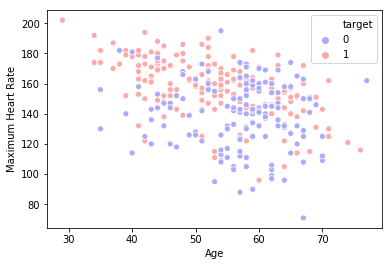

In [19]:
sns.scatterplot(x = 'age', y = 'thalach',hue='target',data = df, palette='bwr')
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

## handle the dummy variables and standarlize the data
We need to standarlize the feature for the purpose of training

In [20]:
# handle the dummy data, there are three dummy datas: cp, slope, thal
a = pd.get_dummies(df['cp'], prefix='cp')
b = pd.get_dummies(df['slope'], prefix='slope')
c = pd.get_dummies(df['thal'], prefix='thal')

# new frame
frames = [df, a, b, c]
df_dummyed = pd.concat(frames, axis=1)
df_dummyed.drop(['cp', 'slope', 'thal'], axis=1, inplace= True)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
scaler.fit(df_dummyed.drop(['target','cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0',
       'thal_1', 'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2'], axis=1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
scaled_features = scaler.transform(df_dummyed.drop(['target','cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0',
       'thal_1', 'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2'], axis=1))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [24]:
df_feat = pd.DataFrame(scaled_features, columns=df_dummyed.columns[:-12])
df_feat = df_feat.join(df_dummyed[['cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0',
       'thal_1', 'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2']])
df_feat.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,0.952197,0.681005,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-0.714429,...,0,0,1,0,1,0,0,1,0,0
1,-1.915313,0.681005,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-0.714429,...,0,1,0,0,0,1,0,1,0,0
2,-1.474158,-1.468418,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,-0.714429,...,1,0,0,0,0,1,0,0,0,1
3,0.180175,0.681005,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,-0.714429,...,1,0,0,0,0,1,0,0,0,1
4,0.290464,-1.468418,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,-0.714429,...,0,0,0,0,0,1,0,0,0,1


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, df['target'], test_size= 0.20, random_state=0)

## Machine Learning

Logistic Regression

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
precisions = [] 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
print("Test Accuracy {:.2f}%".format(lr.score(X_test,y_test)*100))
precisions.append(lr.score(X_test,y_test)*100)

Test Accuracy 83.61%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
pred_y = lr.predict(X_test)
print("Classification report:\n")
print(classification_report(y_test, pred_y))

print("Confusion matrix:\n")
print(confusion_matrix(y_test, pred_y))

Classification report:

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

   micro avg       0.84      0.84      0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

Confusion matrix:

[[21  6]
 [ 4 30]]


K-Nearest Neighbour (KNN) Classification

In [30]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(X_test, y_test)*100))


2 NN Score: 81.97%


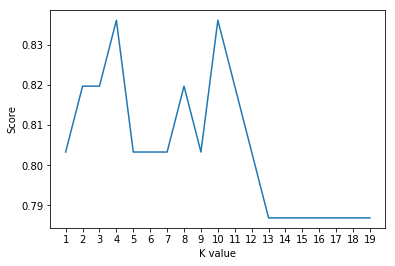

Maximum KNN Score is 83.61%


In [31]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()


print("Maximum KNN Score is {:.2f}%".format((max(scoreList))*100))

In [32]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)  # n_neighbors means k
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(X_test, y_test)*100))
precisions.append(knn.score(X_test,y_test)*100)

2 NN Score: 83.61%


In [33]:
pred_y = knn.predict(X_test)
print("Classification report:\n")
print(classification_report(y_test, pred_y))

print("Confusion matrix:\n")
print(confusion_matrix(y_test, pred_y))

Classification report:

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.85      0.85      0.85        34

   micro avg       0.84      0.84      0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

Confusion matrix:

[[22  5]
 [ 5 29]]


Support Vector Machine (SVM) Algorithm

In [35]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(svm.score(X_test,y_test)*100))
precisions.append(svm.score(X_test,y_test)*100)


Test Accuracy of SVM Algorithm: 86.89%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [36]:
pred_y = svm.predict(X_test)
print("Classification report:\n")
print(classification_report(y_test, pred_y))

print("Confusion matrix:\n")
print(confusion_matrix(y_test, pred_y))

Classification report:

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

   micro avg       0.87      0.87      0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion matrix:

[[23  4]
 [ 4 30]]


Naive Bayes Algorithm

In [37]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Accuracy of Naive Bayes: {:.2f}%".format(nb.score(X_test,y_test)*100))
precisions.append(nb.score(X_test,y_test)*100)

Accuracy of Naive Bayes: 86.89%


In [38]:
pred_y = nb.predict(X_test)
print("Classification report:\n")
print(classification_report(y_test, pred_y))

print("Confusion matrix:\n")
print(confusion_matrix(y_test, pred_y))

Classification report:

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

   micro avg       0.87      0.87      0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion matrix:

[[23  4]
 [ 4 30]]


Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc.score(X_test, y_test)*100))
precisions.append(dtc.score(X_test, y_test)*100)

Decision Tree Test Accuracy 77.05%


In [42]:
pred_y = dtc.predict(X_test)
print("Classification report:\n")
print(classification_report(y_test, pred_y))

print("Confusion matrix:\n")
print(confusion_matrix(y_test, pred_y))

Classification report:

              precision    recall  f1-score   support

           0       0.72      0.78      0.75        27
           1       0.81      0.76      0.79        34

   micro avg       0.77      0.77      0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

Confusion matrix:

[[21  6]
 [ 8 26]]


Random forest

In [43]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(rf.score(X_test,y_test)*100))
precisions.append(rf.score(X_test,y_test)*100)

Random Forest Algorithm Accuracy Score : 88.52%


In [44]:
pred_y = rf.predict(X_test)
print("Classification report:\n")
print(classification_report(y_test, pred_y))

print("Confusion matrix:\n")
print(confusion_matrix(y_test, pred_y))

Classification report:

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

   micro avg       0.89      0.89      0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61

Confusion matrix:

[[23  4]
 [ 3 31]]


BOOM！ Why not try some boosting method

In [45]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100)
abc.fit(X_train, y_train)
print("AdaBoost Accuracy Score : {:.2f}%".format(abc.score(X_test,y_test)*100))
precisions.append(abc.score(X_test,y_test)*100)

AdaBoost Accuracy Score : 85.25%


In [46]:
pred_y = rf.predict(X_test)
print("Classification report:\n")
print(classification_report(y_test, pred_y))

print("Confusion matrix:\n")
print(confusion_matrix(y_test, pred_y))

Classification report:

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

   micro avg       0.89      0.89      0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61

Confusion matrix:

[[23  4]
 [ 3 31]]


## Conclusion

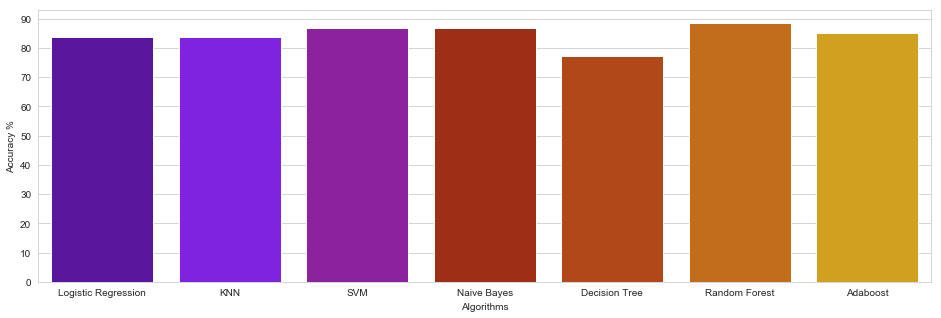

In [48]:
methods = ["Logistic Regression", "KNN", "SVM", "Naive Bayes", "Decision Tree", "Random Forest", "Adaboost"]
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=precisions, palette="gnuplot")
plt.show()